<a href="https://colab.research.google.com/github/NHU19/test_project/blob/main/6%EC%A3%BC%EC%B0%A8_%EC%8B%A4%EC%8A%B5%EA%B3%BC%EC%A0%9C_LSTM%EC%9D%84_%ED%99%9C%EC%9A%A9%ED%95%9C_%ED%98%84%EB%8C%80%EC%B0%A8_%EC%A3%BC%EA%B0%80%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**삼성전자**의 주가데이터를 가져와서 예측

In [6]:
# 현대차 주식코드: 005380
STOCK_CODE = '005380'

In [7]:
stock = fdr.DataReader(STOCK_CODE)

In [9]:
stock.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1998-05-07,11823,11823,11088,11355,60020,NaN
1998-05-08,11222,11355,11088,11088,57320,-0.023514
1998-05-09,11222,11522,11222,11355,29180,0.024080
1998-05-11,11355,11355,11021,11021,34650,-0.029414
1998-05-12,11155,11222,10687,10687,79080,-0.030306


In [10]:
stock.tail()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2022-07-05,180000,181000,173500,177500,1097504,-0.002809
2022-07-06,176000,177000,172000,172500,924184,-0.028169
2022-07-07,175000,177000,172500,175000,536363,0.014493
2022-07-08,177500,180500,177000,178000,824702,0.017143
2022-07-11,180000,182000,179000,180500,409042,0.014045


In [11]:
stock.index

DatetimeIndex(['1998-05-07', '1998-05-08', '1998-05-09', '1998-05-11',
               '1998-05-12', '1998-05-13', '1998-05-14', '1998-05-15',
               '1998-05-16', '1998-05-18',
               ...
               '2022-06-28', '2022-06-29', '2022-06-30', '2022-07-01',
               '2022-07-04', '2022-07-05', '2022-07-06', '2022-07-07',
               '2022-07-08', '2022-07-11'],
              dtype='datetime64[ns]', name='Date', length=6000, freq=None)

위에서 보시는 바와 같이 index가 `DatetimeIndex`로 지정되어 있습니다.

`DatetimeIndex`로 정의되어 있다면, 아래와 같이 연도, 월, 일을 쪼갤 수 있으며, **월별, 연도별 피벗데이터**를 만들때 유용하게 활용할 수 있습니다.

In [12]:
stock['Year'] = stock.index.year
stock['Month'] = stock.index.month
stock['Day'] = stock.index.day

In [13]:
stock.head()

,Open,High,Low,Close,Volume,Change,Year,Month,Day
Date,,,,,,,,,
1998-05-07,11823,11823,11088,11355,60020,NaN,1998,5,7
1998-05-08,11222,11355,11088,11088,57320,-0.023514,1998,5,8
1998-05-09,11222,11522,11222,11355,29180,0.024080,1998,5,9
1998-05-11,11355,11355,11021,11021,34650,-0.029414,1998,5,11
1998-05-12,11155,11222,10687,10687,79080,-0.030306,1998,5,12


## 시각화

Text(0, 0.5, 'price')

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


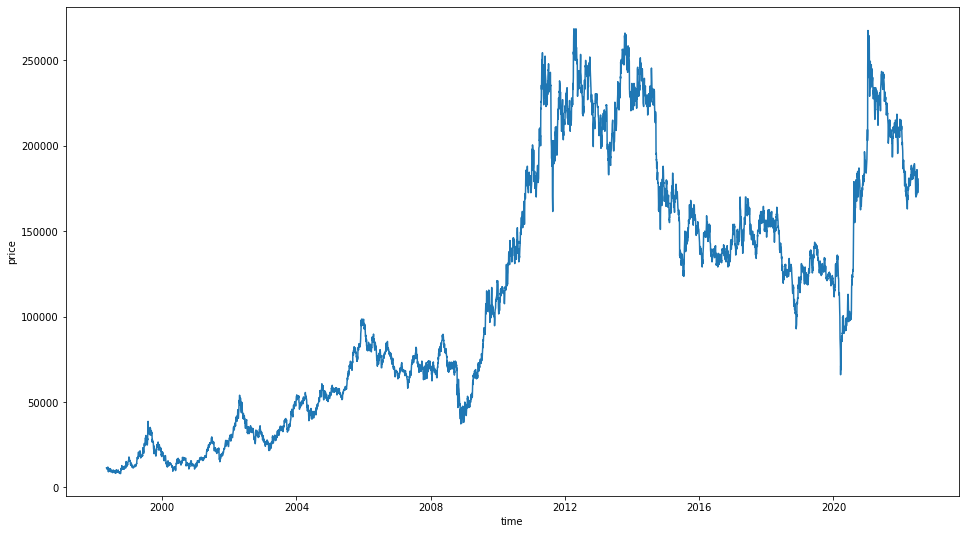

In [14]:
plt.figure(figsize=(16, 9))
sns.lineplot(y=stock['Close'], x=stock.index)
plt.xlabel('time')
plt.ylabel('price')

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


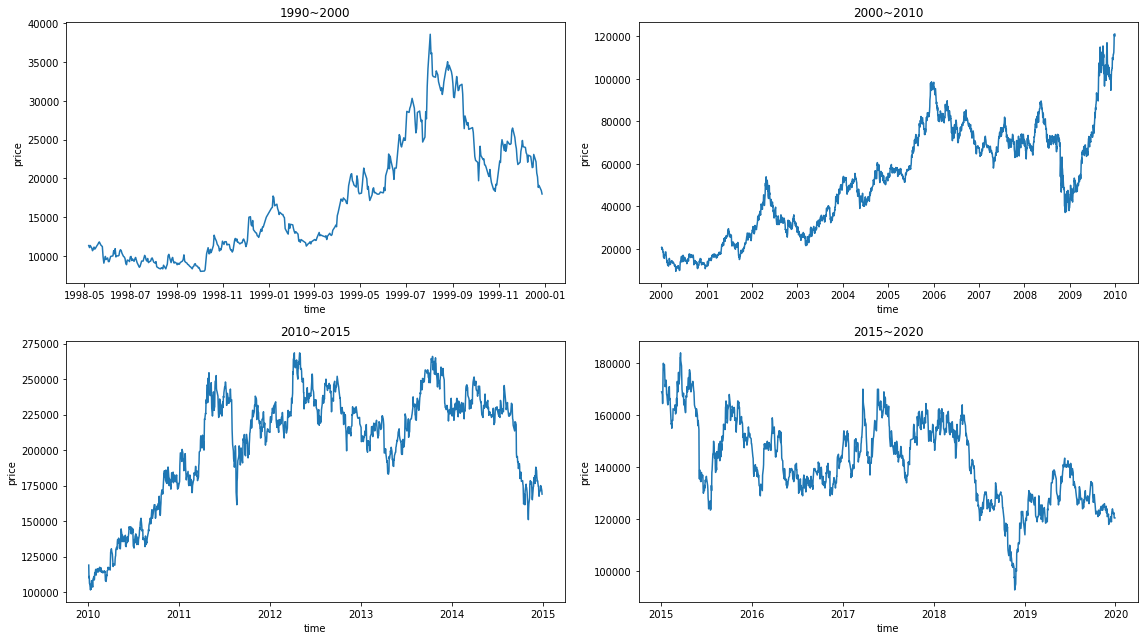

In [15]:
time_steps = [['1990', '2000'], # 특정기간을 설정하여 subplot 표현
              ['2000', '2010'], 
              ['2010', '2015'], 
              ['2015', '2020']]

fig, axes = plt.subplots(2, 2)
fig.set_size_inches(16, 9)
for i in range(4):
    ax = axes[i//2, i%2]
    df = stock.loc[(stock.index > time_steps[i][0]) & (stock.index < time_steps[i][1])]
    sns.lineplot(y=df['Close'], x=df.index, ax=ax) # 선형플롯
    ax.set_title(f'{time_steps[i][0]}~{time_steps[i][1]}')
    ax.set_xlabel('time')
    ax.set_ylabel('price')
plt.tight_layout()
plt.show()

## 데이터 전처리

주가 데이터에 대하여 딥러닝 모델이 더 잘 학습할 수 있도록 **정규화(Normalization)**를 해주도록 하겠습니다.

**표준화 (Standardization)**와 **정규화(Normalization)**에 대한 내용은 아래 링크에서 더 자세히 다루니, 참고해 보시기 바랍니다.

- [데이터 전처리에 관하여](https://teddylee777.github.io/scikit-learn/scikit-learn-preprocessing)

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() # MinMaxScaler 인스턴스화

# 스케일을 적용할 column을 정의합니다.
scale_cols = ['Open', 'High', 'Low', 'Close', 'Volume']

# 스케일 후 columns
scaled = scaler.fit_transform(stock[scale_cols])
scaled

array([[0.01403752, 0.0130149 , 0.01226761, 0.01277676, 0.00208125],
       [0.01175119, 0.01134842, 0.01226761, 0.0117517 , 0.0019804 ],
       [0.01175119, 0.01194308, 0.01278683, 0.01277676, 0.00092932],
       ...,
       [0.6347963 , 0.60118505, 0.63770643, 0.64103765, 0.01987358],
       [0.64430682, 0.61364802, 0.65514302, 0.65255516, 0.0306436 ],
       [0.65381733, 0.61898929, 0.66289261, 0.66215308, 0.01511789]])

스케일이 완료된 column으로 새로운 데이터프레임을 생성합니다.

**시간 순으로 정렬**되어 있으며, datetime index는 제외

*6,000개의 row, 5개 column*으로 이루어진 데이터셋이 DataFrame으로 정리되었습니다.

In [17]:
df = pd.DataFrame(scaled, columns=scale_cols)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    6000 non-null   float64
 1   High    6000 non-null   float64
 2   Low     6000 non-null   float64
 3   Close   6000 non-null   float64
 4   Volume  6000 non-null   float64
dtypes: float64(5)
memory usage: 234.5 KB


## train / test 분할

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('Close', 1), df['Close'], test_size=0.2, random_state=0, shuffle=False)

In [20]:
x_train.shape, y_train.shape

((4800, 4), (4800,))

In [21]:
x_test.shape, y_test.shape

((1200, 4), (1200,))

In [22]:
x_train

,Open,High,Low,Volume
0,0.014038,0.013015,0.012268,0.002081
1,0.011751,0.011348,0.012268,0.001980
2,0.011751,0.011943,0.012787,0.000929
3,0.012257,0.011348,0.012008,0.001134
4,0.011496,0.010875,0.010714,0.002793
...,...,...,...,...
4795,0.511160,0.490799,0.519525,0.011787
4796,0.520670,0.490799,0.523400,0.015421
4797,0.513062,0.485457,0.517588,0.009207
4798,0.516866,0.489018,0.525337,0.009303


## TensroFlow Dataset을 활용한 시퀀스 데이터셋 구성

In [23]:
import tensorflow as tf

In [24]:
def windowed_dataset(series, window_size, batch_size, shuffle):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    if shuffle:
        ds = ds.shuffle(1000)
    ds = ds.map(lambda w: (w[:-1], w[-1]))
    return ds.batch(batch_size).prefetch(1)

Hyperparameter를 정의합니다.

In [25]:
WINDOW_SIZE=20
BATCH_SIZE=32

In [26]:
# train_data는 학습용 데이터셋, test_data는 검증용 데이터셋 입니다.
train_data = windowed_dataset(y_train, WINDOW_SIZE, BATCH_SIZE, True)
test_data = windowed_dataset(y_test, WINDOW_SIZE, BATCH_SIZE, False)

In [27]:
# 아래의 코드로 데이터셋의 구성을 확인해 볼 수 있습니다.
# X: (batch_size, window_size, feature)
# Y: (batch_size, feature)
for data in train_data.take(1):
    print(f'데이터셋(X) 구성(batch_size, window_size, feature갯수): {data[0].shape}')
    print(f'데이터셋(Y) 구성(batch_size, window_size, feature갯수): {data[1].shape}')

데이터셋(X) 구성(batch_size, window_size, feature갯수): (32, 20, 1)
데이터셋(Y) 구성(batch_size, window_size, feature갯수): (32, 1)


## 모델

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Lambda
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


model = Sequential([
    # 1차원 feature map 생성
    Conv1D(filters=32, kernel_size=5,
           padding="causal",
           activation="relu",
           input_shape=[WINDOW_SIZE, 1]),
    # LSTM
    LSTM(16, activation='tanh'),
    Dense(16, activation="relu"),
    Dense(1),
])

In [29]:
# Sequence 학습에 비교적 좋은 퍼포먼스를 내는 Huber()를 사용합니다.
loss = Huber()
optimizer = Adam(0.0005)
model.compile(loss=Huber(), optimizer=optimizer, metrics=['mse'])

In [30]:
# earlystopping은 10번 epoch통안 val_loss 개선이 없다면 학습을 멈춥니다.
earlystopping = EarlyStopping(monitor='val_loss', patience=10)
# val_loss 기준 체크포인터도 생성합니다.
filename = os.path.join('tmp', 'ckeckpointer.ckpt')
checkpoint = ModelCheckpoint(filename, 
                             save_weights_only=True, 
                             save_best_only=True, 
                             monitor='val_loss', 
                             verbose=1)

In [31]:
history = model.fit(train_data, 
                    validation_data=(test_data), 
                    epochs=50, 
                    callbacks=[checkpoint, earlystopping])

Epoch 1/50
    148/Unknown - 15s 7ms/step - loss: 4.2992e-04 - mse: 8.5985e-04
Epoch 1: val_loss improved from inf to 0.00042, saving model to tmp/ckeckpointer.ckpt
150/150 [==============================] - 16s 14ms/step - loss: 4.3015e-04 - mse: 8.6030e-04 - val_loss: 4.2232e-04 - val_mse: 8.4464e-04
Epoch 2/50
147/150 [============================>.] - ETA: 0s - loss: 1.9709e-04 - mse: 3.9417e-04
Epoch 2: val_loss improved from 0.00042 to 0.00038, saving model to tmp/ckeckpointer.ckpt
150/150 [==============================] - 1s 8ms/step - loss: 1.9962e-04 - mse: 3.9924e-04 - val_loss: 3.7840e-04 - val_mse: 7.5681e-04
Epoch 3/50
140/150 [===========================>..] - ETA: 0s - loss: 1.7299e-04 - mse: 3.4597e-04
Epoch 3: val_loss improved from 0.00038 to 0.00033, saving model to tmp/ckeckpointer.ckpt
150/150 [==============================] - 1s 8ms/step - loss: 1.7828e-04 - mse: 3.5657e-04 - val_loss: 3.3099e-04 - val_mse: 6.6198e-04
Epoch 4/50
146/150 [========================

저장한 ModelCheckpoint 를 로드합니다.

In [32]:
model.load_weights(filename)

`test_data`를 활용하여 예측을 진행합니다.

In [33]:
pred = model.predict(test_data)

In [34]:
pred.shape

(1180, 1)

## 예측 데이터 시각화

아래 시각화 코드중 y_test 데이터에 **[20:]**으로 슬라이싱을 한 이유는

예측 데이터에서 20일치의 데이터로 21일치를 예측해야하기 때문에 test_data로 예측 시 *앞의 20일은 예측하지 않습니다.*

따라서, 20번 째 index와 비교하면 더욱 정확합니다.

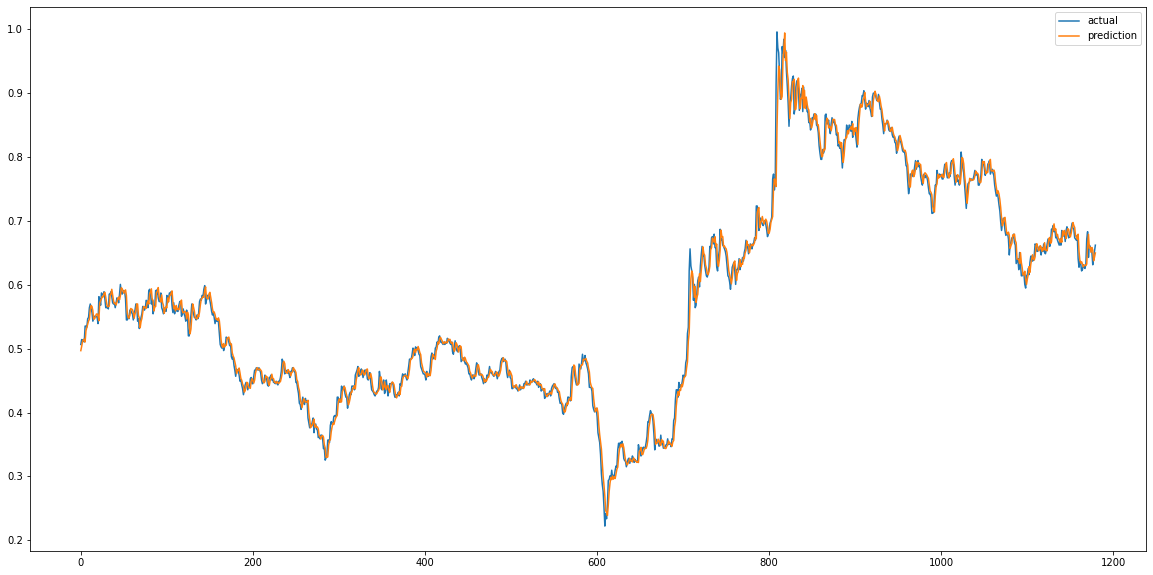

In [35]:
plt.figure(figsize=(20, 10))
plt.plot(np.asarray(y_test)[20:], label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()